In [62]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

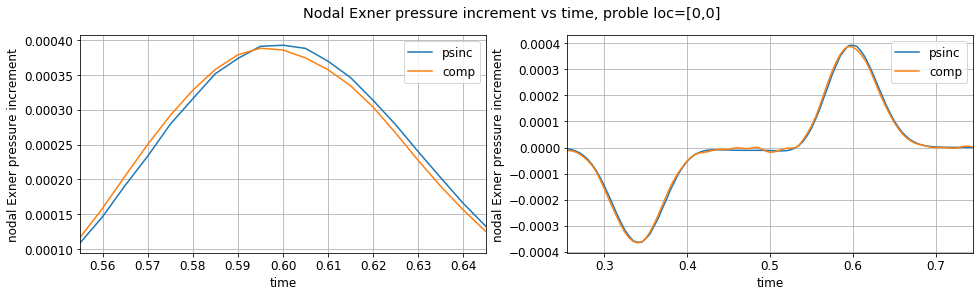

In [199]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 2
et = 1.0
N = 1

probe_loc=[0,0]

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et,Nz=64)
tags = list(tc.get_tag_dict().values())

dtag = tc.get_debug_attrs()

psinc_sfx = '3D_psinc'
comp_bal_sfx = '3D_comp_bal'

sfxs = ['3D_w=16-0','3D_w=10-6','3D_w=0-16']

# attributes = ['rho', 'rhou', 'rhow', 'rhoY', 'buoy', 'p2_nodes']
attributes = ['p2_nodes']

times = np.arange(0.0,1.001,0.005)
t_axs = times
# times = times[140:]
times = np.array([times[110:130],times[50:150]])
t_axss = times

slc = 5
slc = (slice(None,),slice(slc,slc+1),slice(None,))

lst = np.zeros((len(attrs), times.shape[0]), dtype='object')

diff = False

pl = pt.plotter_1d(ncols=2,nrows=1,figsize=(16,4),fontsize=12)
pl.set_suptitle("Nodal Exner pressure increment vs time, proble loc=[%i,%i]" %(probe_loc[0],probe_loc[1]))
for nn,tt in enumerate(times):
    for mm,attribute in enumerate(attributes):
        if attribute == 'p2_nodes':
            diff = True
            t_axss[nn] = t_axss[nn][1:]

        psinc = tc.get_time_series(tt, N, attribute, psinc_sfx, probe_loc, diff=diff, slc=slc)
        comp = tc.get_time_series(tt, N, attribute, comp_bal_sfx, probe_loc, diff=diff, slc=slc)
        
        ax = pl.get_ax(nn)
        ax.plot(t_axss[nn],psinc, label='psinc')
        ax.plot(t_axss[nn],comp, label='comp')
        ax.set_xlim([t_axss[nn][0],t_axss[nn][-1]])
        ax.grid()
        ax.legend()
        ax.set_xlabel('time')
        ax.set_ylabel('nodal Exner pressure increment')
        
pl.save_fig('TVHS_probe')

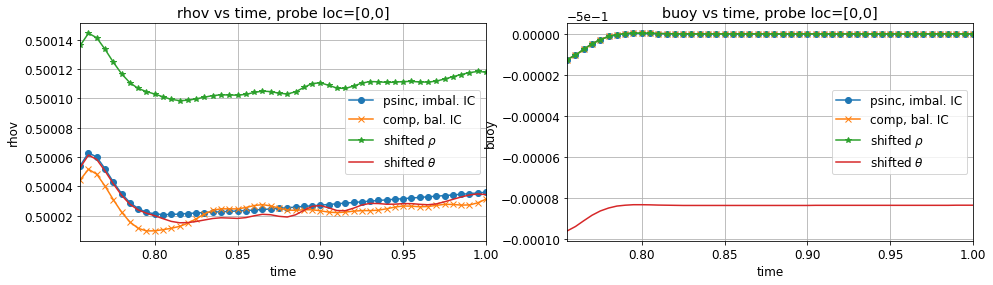

In [132]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
N = 1

probe_loc=[0,0]

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
tags = list(tc.get_tag_dict().values())

attributes = ['rho', 'rhou', 'rhov', 'buoy', 'rhoY', 'p2_nodes']
attributes = ['rhov', 'buoy']
# attributes = ['p2_nodes']

times = np.arange(0.0,1.001,0.005)
times = times[1:]
times = times[150:]
t_axs = times

comp_bal_sfx = 'comp_bal'
psinc_sfx = 'psinc_imbal'

sfx1 = 'shift_rho'
sfx2 = 'shift_theta'

diff = False

ncols = 2
nrows = 1
pl = pt.plotter_1d(ncols=ncols,nrows=nrows, figsize=(16,4),fontsize=12)
for nn,attribute in enumerate(attributes):
    if attribute == 'p2_nodes':
        diff = True
        t_axs = t_axs[1:]

    psinc = tc.get_time_series(times, N, attribute, psinc_sfx, probe_loc, diff=diff)
    comp = tc.get_time_series(times, N, attribute, comp_bal_sfx, probe_loc, diff=diff)
    
    shift_rho = tc.get_time_series(times, N, attribute, sfx1, probe_loc, diff=diff, cont_blend=True, fs=1, ts=0)
    shift_theta = tc.get_time_series(times, N, attribute, sfx2, probe_loc, diff=diff, cont_blend=True, fs=1, ts=0)
    
    ax = pl.get_ax(nn)
    ax.plot(t_axs,psinc, '-o', label='psinc, imbal. IC')
    ax.plot(t_axs,comp, '-x', label='comp, bal. IC')
    ax.plot(t_axs,shift_rho, '-*', label=r'shifted $\rho$')
    ax.plot(t_axs,shift_theta, label=r'shifted $\theta$')
    ax.legend()
    ax.set_xlim(t_axs[0],t_axs[-1])
    ax.set_title('%s vs time, probe loc=[%i,%i]' %(attribute,probe_loc[0],probe_loc[1]))
    ax.set_xlabel('time')
    ax.set_ylabel(attribute)
    ax.grid()
    
pl.save_fig('shifted_rho_theta')

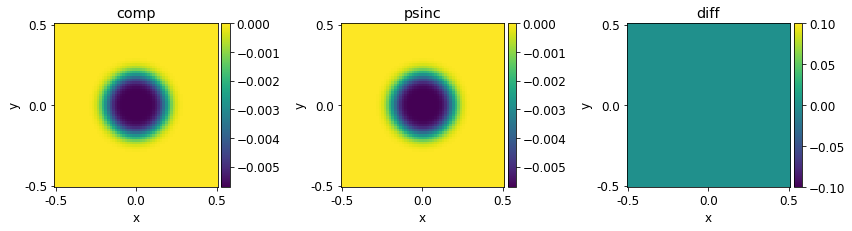

In [198]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64
et = 1.0
N = 1

probe_loc=[0,0]

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
tags = list(tc.get_tag_dict().values())

attributes = ['rho', 'rhou', 'rhov', 'buoy', 'rhoY', 'p2_nodes']
attributes = ['rhov', 'buoy']
attributes = ['p2_nodes']

# times = np.arange(0.0,1.001,0.005)
time = 0.000
# times = times[1:]
# times = times[150:]
t_axs = times

comp_bal_sfx = 'comp_bal'
psinc_sfx = 'psinc_bal'

diff = False

ncols = 2
nrows = 1

for nn,attribute in enumerate(attributes):
    fn = tc.get_filename(1,comp_bal_sfx)
    path = tc.get_path(fn)
    comp = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)
    
    fn = tc.get_filename(1,psinc_sfx)
    path = tc.get_path(fn)
    psinc = tc.get_arr(path, time, 1, attribute, label_type='TIME', inner=True)
    
    diff = comp - psinc
    pls = [[comp,'comp'],[psinc,'psinc'],[diff,'diff']]
    
    pl = pt.plotter(pls,figsize=(12,6))
    pl.set_axes([0,32,64], [-0.5,0.0,0.5], [0,32,64], [-0.5,0.0,0.5], 'x', 'y')
    pl.plot(fontsize=12, method='imshow')
    
    pl.save_fig('TVHS_diff')

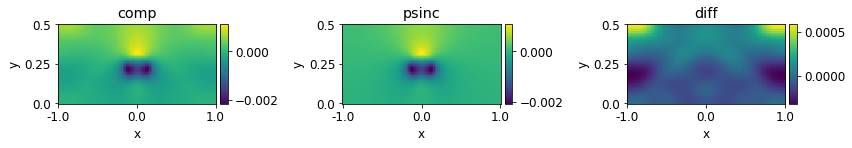

In [166]:
from importlib import reload
import utils
utils = reload(utils)

import plotting_tools as pt
pt = reload(pt)

base_fn = "output_rising_bubble"
py_directory = "../%s/" %base_fn

Nx = 100
Ny = 50
et = 10.0

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)
tags = list(tc.get_tag_dict().values())

attributes = ['rho', 'rhou', 'rhov', 'buoy', 'rhoY', 'p2_nodes']
attributes = ['rhov', 'buoy']
attributes = ['p2_nodes']

# times = np.arange(0.0,1.001,0.005)
time = 100
# times = times[1:]
# times = times[150:]
t_axs = times

comp_bal_sfx = 'comp'
psinc_sfx = 'psinc'

diff = False

ncols = 2
nrows = 1

for nn,attribute in enumerate(attributes):
    fn = tc.get_filename(1,comp_bal_sfx)
    path = tc.get_path(fn)
    comp = tc.get_arr(path, time, 1, attribute, label_type='STEP', inner=True).T
    
    fn = tc.get_filename(1,psinc_sfx)
    path = tc.get_path(fn)
    psinc = tc.get_arr(path, time, 1, attribute, label_type='STEP', inner=True).T
    
    diff = comp - psinc
    pls = [[comp,'comp'],[psinc,'psinc'],[diff,'diff']]
    
    pl = pt.plotter(pls,figsize=(12,6))
    pl.set_axes([0,50,100], [-1.0,0.0,1.0], [0,25,50], [0.0,0.25,0.5], 'x', 'y')
    pl.plot(fontsize=12, method='imshow')
    
    pl.save_fig('RBVS_diff')

comp-psinc: 1.3489892e-05
w=8-8 5.0503033e-05
w=10-6 1.32381665e-05
w=12-4 2.1127955e-05


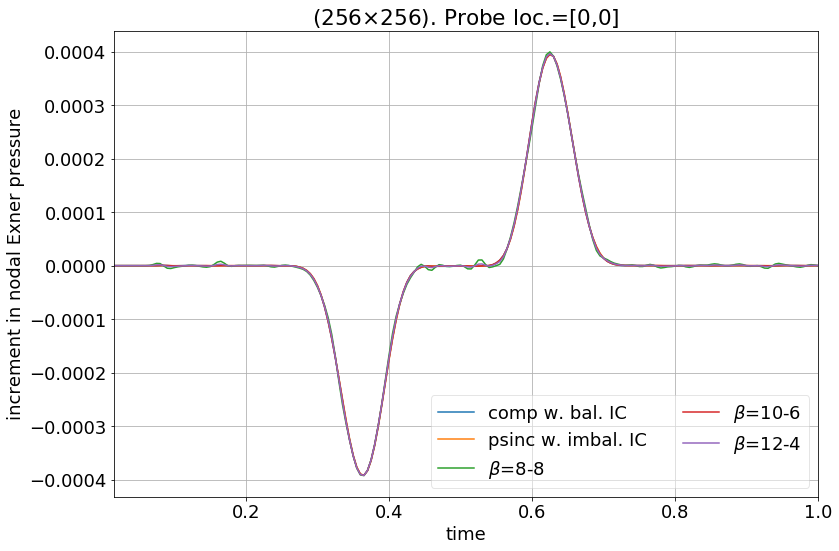

In [339]:
base_fn = "output_travelling_vortex"
directory = "output_travelling_vortex"
py_directory = "../%s/" %directory

Nx = 64
Ny = 64

Nx, Ny = 128, 128
Nx, Ny = 256, 256
et = 1.0

tc = utils.test_case(base_fn,py_directory,Nx,Ny,et)

# steps = np.arange(176) # 64x64
# dt = 1./(176-1)
# steps = np.arange(355) # 128x128
# steps = np.arange(711) # 256x256
# steps = steps[74:93] # 64x64
# steps = steps[155:185] # 128x128
# steps = steps[329:381] # 256x256

steps = np.arange(0.0,1.005,0.005)
steps = steps[2:]

fn_sfx = 'full'
# steps = steps[-50:]
# fn_sfx = 'last_50'

# steps = steps[:50]
probe_loc = [0,0]

comp = []
psinc = []

attribute = 'p2_nodes'
diff = True

lt = 'TIME'

def get_cbs(cbs,cbs_suffix):
    cb_suffix = tc.cb_suffix(cbs[0],cbs[1],cbs_suffix)
    return [(tc.get_time_series(steps,1,attribute,cb_suffix,probe_loc,label_type=lt,diff=diff))]

comp.append(tc.get_time_series(steps,1,attribute,'comp_bal',probe_loc,label_type=lt,diff=diff))
psinc.append(tc.get_time_series(steps,1,attribute,'psinc_imbal',probe_loc,label_type=lt,diff=diff))

comp = comp[0]
psinc = psinc[0]

norm = np.linalg.norm(comp-psinc)
print('comp-psinc:', norm)

print_norm = False

steps_axs = steps[1:] #* dt
# print(steps_axs)
fig = plt.figure(figsize=(12,8))

ps = '-o' if fn_sfx == 'last_50' else '-'
if print_norm == True:
    plt.plot(steps_axs, comp, ps, label='comp w. bal. IC, %.6f' %norm)
else:
    plt.plot(steps_axs, comp, ps, label='comp w. bal. IC')
plt.plot(steps_axs, psinc, label='psinc w. imbal. IC')

end_weight = 16+1 # 16+1, 24+1
start_weight = 0 # 0, 16
intervals = 2 # 2, 1
weight = 16 # 16, 32

start_weight = 8
end_weight = 12+1

for i,w in enumerate(range(start_weight,end_weight,intervals)):
    cbs, cbs_suffix = [1,0], 'w=%i-%i' %(w,weight-w)
    cb = get_cbs(cbs,cbs_suffix)[0]
    norm = np.linalg.norm(cb-psinc)
    print(cbs_suffix, norm)
    ps = '-o' if w==10 and fn_sfx=='last_50' else '-'
    if print_norm == True:
        plt.plot(steps_axs, cb, ps, label=r'$\beta$%s, %.6f' %(cbs_suffix[1:], norm))
    else:
        plt.plot(steps_axs, cb, ps, label=r'$\beta$%s' %(cbs_suffix[1:]))
# cbs, cbs_suffix = [1,0], ''
# cb = get_cbs(cbs,cbs_suffix)[0]
# plt.plot(steps_axs, cb, label='%s' %(cbs_suffix))
    
fontsize=18
plt.rcParams.update({'font.size': fontsize})

plt.ylabel('increment in nodal Exner pressure')
plt.xlabel('time')
plt.title(r"(%i$\times$%i). Probe loc.=[%i,%i]" %(Nx,Ny,probe_loc[0],probe_loc[1]))

plt.xlim([steps_axs[0],steps_axs[-1]])
plt.legend(ncol=2,loc='lower right', framealpha=0.5)
plt.grid()
plt.tight_layout()
# plt.savefig('optimal_weights_first_50.pdf')
# plt.savefig('optimal_weights_last_50.pdf')
# plt.savefig('optimal_weights_full.pdf')

plt.savefig('%i_%i_%s.pdf' %(Nx,Ny,fn_sfx))
plt.show()